# Objective of the project

Jacob housing group is a real estate company in boston they have recently suffered considerable dips in their revenues due to the ongoing pandemic. The company is finding it difficult to sustain in the current market scenarios. 
So they have contacted a consulting group to understand the factors on which the prices of the houses depend.

The problem on hand is to predict the housing prices of a town or a suburb based on the features of the locality provided to us. In the process, we need to identify the most important features in the dataset. We need to find features which are significant in predicting the prices of the house.
We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for us.

# Importing required Libraries 

In [1]:
# import libraries for data manipulation
import pandas as pd
import numpy as np

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import ProbPlot

# import libraries for building linear regression model
from statsmodels.formula.api import ols

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# import library for preparing data
from sklearn.model_selection import train_test_split

# import library for data preprocessing
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

# Reading the dataset

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


In [3]:
#about the dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
#preparing the dataset which is currently in the ndarray 
data = pd.DataFrame(boston.data,columns = boston.feature_names)


In [5]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
#as we can observe that we do not have the target variable "price"
data["Price"]=boston.target
data2 = data.copy()
data2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
data['RAD'].unique()

array([ 1.,  2.,  3.,  5.,  4.,  8.,  6.,  7., 24.])

 The price of the house indicated by the variable Price is the target variable and the rest are the independent variables based on which we will predict house price.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


(i) There are a total of 506 non-null observations in each of the columns. This indicates that there are no missing values in the data.


(ii) Every column in this dataset is numeric in nature.

In [9]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Observations:

There is an average of around 6.2 rooms per dwelling across all the towns.

There is a very large variance for crime rate, as we can see that the lowest crime rate is 0.006 whereas the highest one is 88.97. It could be an outlier since it is very different from the median and even 75% quantile value.

Similarly for ZN but it can also be an outlier

Before performing the modeling, it is important to check the univariate distribution of the variables.

# Univariate analysis 

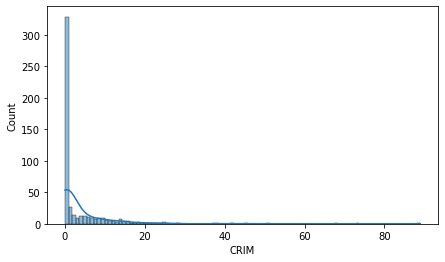

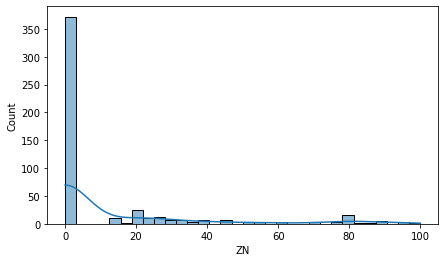

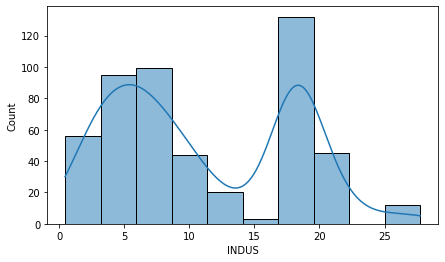

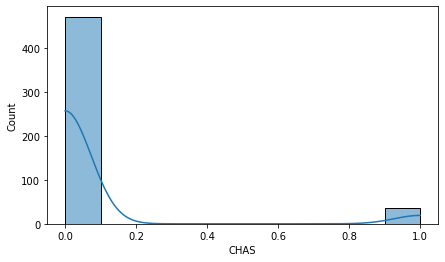

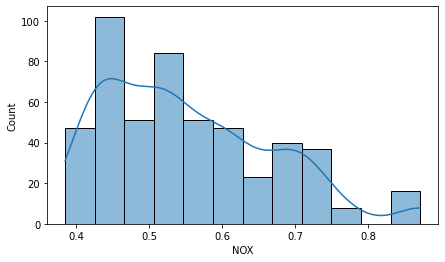

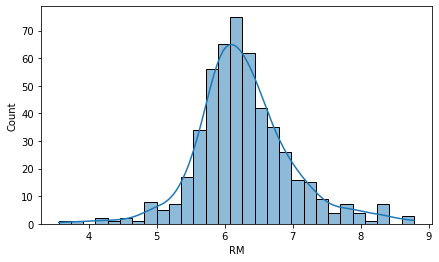

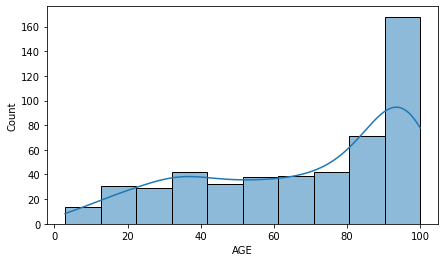

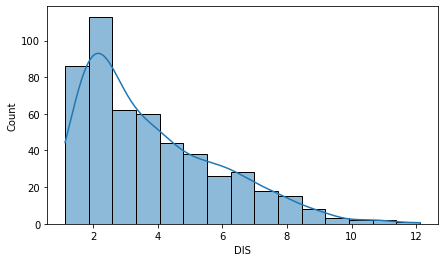

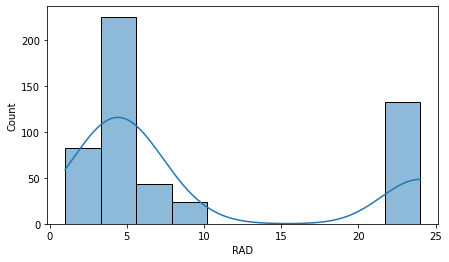

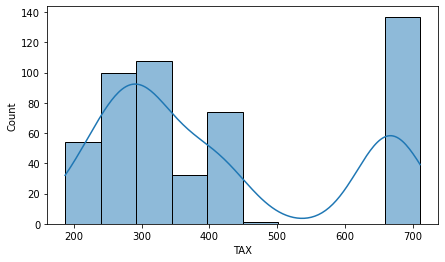

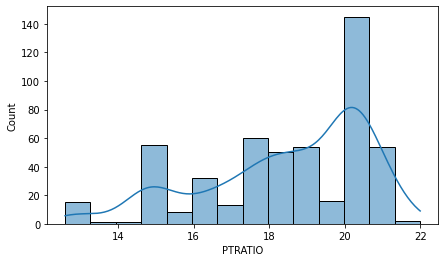

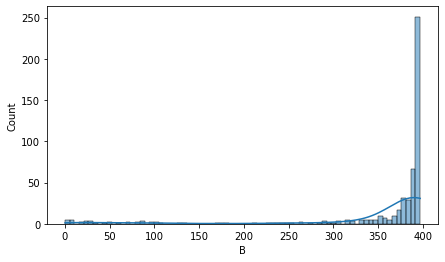

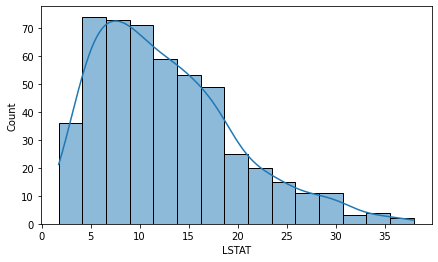

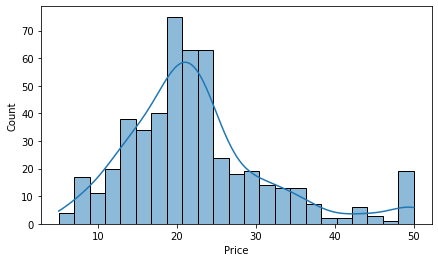

In [10]:
# let's plot all the columns to look at their distributions
for i in data.columns:
    plt.figure(figsize=(7, 4))
    sns.histplot(data=data, x=i, kde = True)
    plt.show()

Observations

The variables CRIM and ZN are positively skewed. This suggests that most of the areas have lower crime rates and most residential plots are under the area of 25,000 sq. ft.

The variable CHAS, with only 2 possible values 0 and 1, follows a binomial distribution, and the majority of the houses are away from Charles river (CHAS = 0).

The distribution of the variable AGE suggests that many of the owner-occupied houses were built before 1940.

The variable DIS (average distances to five Boston employment centers) has a nearly exponential distribution, which indicates that most of the houses are closer to these employment centers.

The variables TAX and RAD have a bimodal distribution., indicating that the tax rate is possibly higher for some properties which have a high index of accessibility to radial highways.

The dependent variable Price seems to be slightly right skewed.

As the dependent variable is sightly skewed, we will apply a log transformation on the 'Price' column and check the distribution of the transformed column. (why? because it pulls backs the larger values)

In [11]:
#transformation
data['Price_log'] = np.log(data['Price'])

<AxesSubplot:xlabel='Price_log', ylabel='Count'>

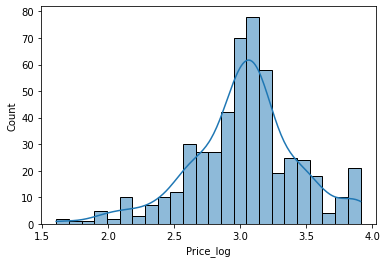

In [12]:
sns.histplot(data=data,x='Price_log',kde=True)

In [13]:
data.skew(axis = 0 )

#The skewnwess has been reduced
#Now the dependent variable is moderately skewed

CRIM         5.223149
ZN           2.225666
INDUS        0.295022
CHAS         3.405904
NOX          0.729308
RM           0.403612
AGE         -0.598963
DIS          1.011781
RAD          1.004815
TAX          0.669956
PTRATIO     -0.802325
B           -2.890374
LSTAT        0.906460
Price        1.108098
Price_log   -0.330321
dtype: float64

Observations

The log-transformed variable (Price_log) appears to have a nearly normal distribution without skew, and hence we can proceed.
Before creating the linear regression model, it is important to check the bivariate relationship between the variables. Let's check the same using the heatmap and scatterplot.

# Bivariate Analysis
Lets look at scatter plot of the data to specify the functional form of the model.

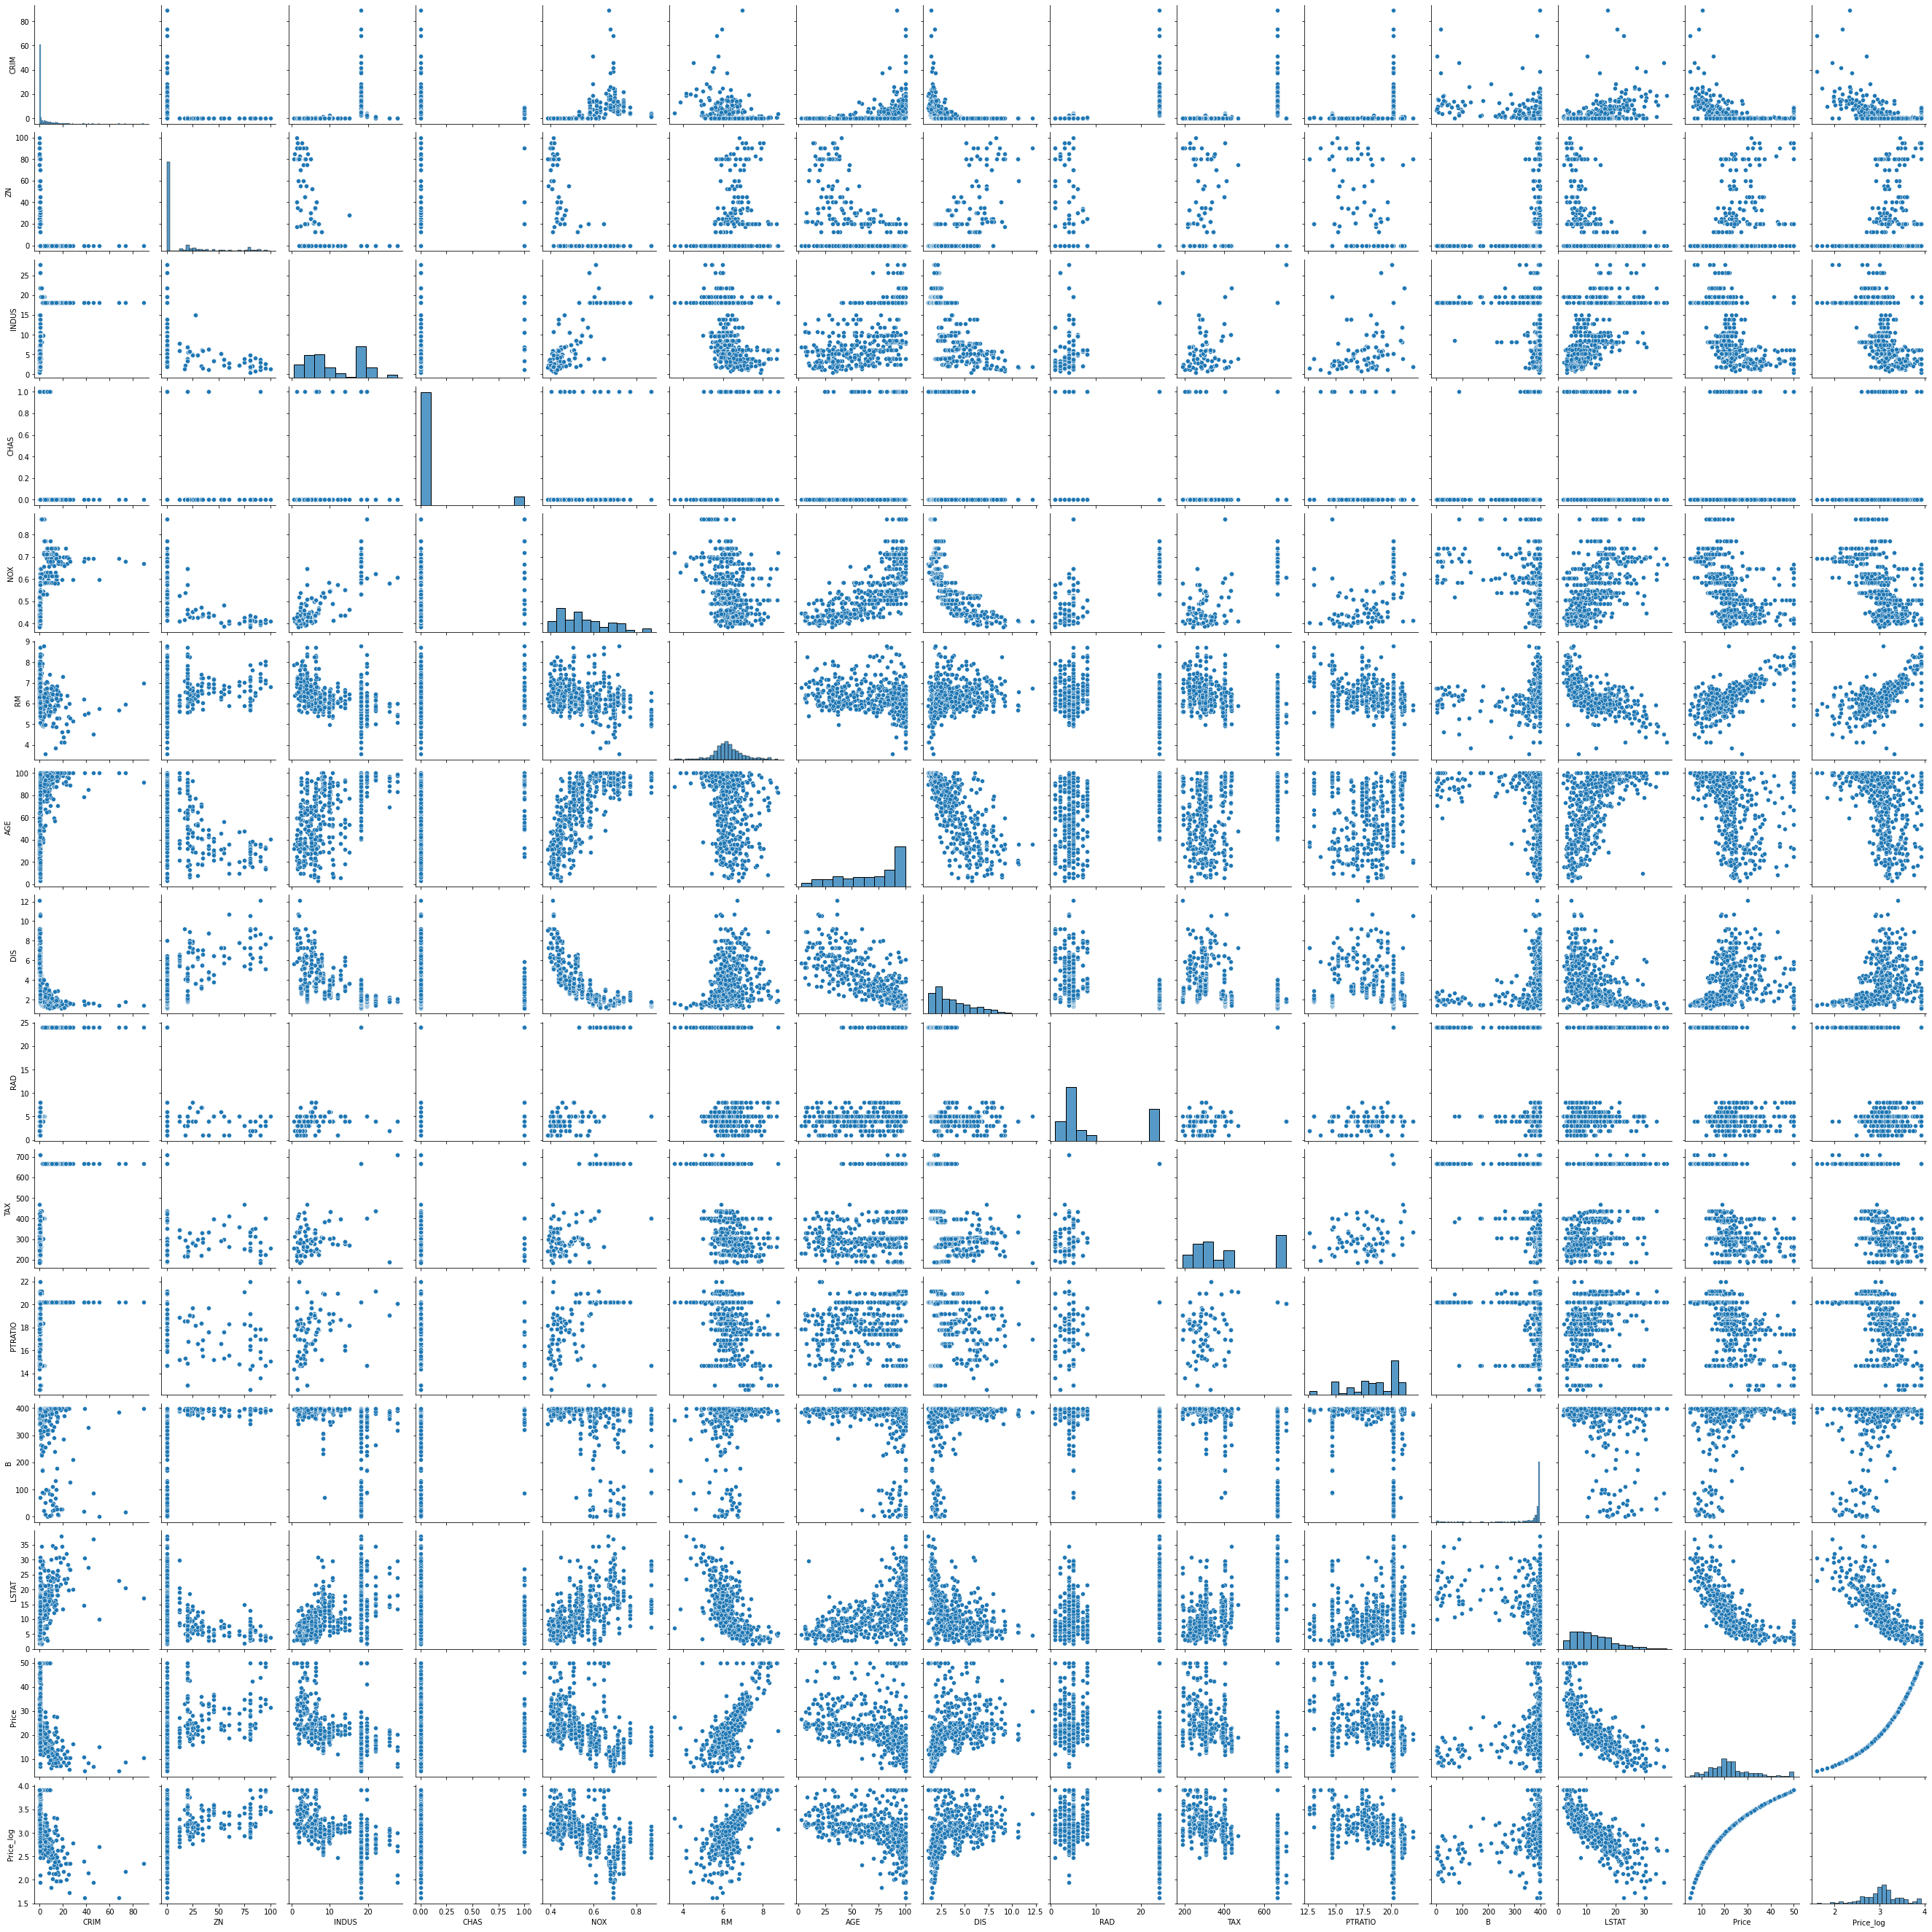

In [14]:
sns.pairplot(data)

Let's check the correlation using a heatmap

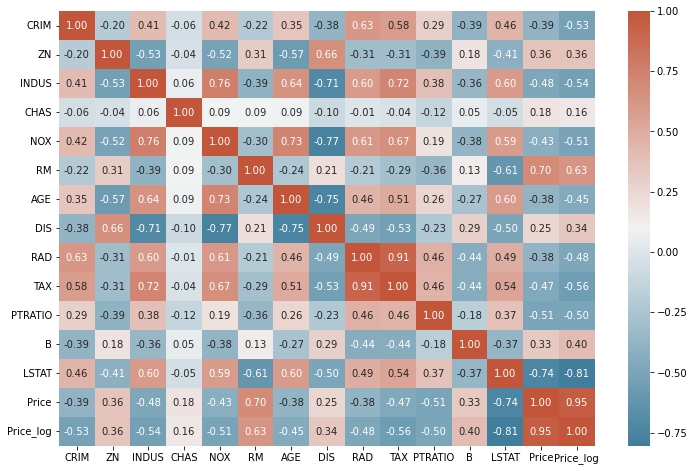

In [15]:
plt.figure(figsize = (12,8))
cmap = sns.diverging_palette(230,20,as_cmap=True)
sns.heatmap(data.corr(),annot=True,fmt='.2f',cmap=cmap)
plt.show()

Observations:

We see a significantly correlated relationship between NOX and INDUS.

NOX also has a high positive correlation value with Age, as well as a significantly negatively correlated value with DIS.

Price has a high correlation value with RM, and also significantly negatively correlated with LSTAT.

INDUS has a high correlation value with TAX

Now, we will visualize the relationship between the pairs of features having significant correlations.

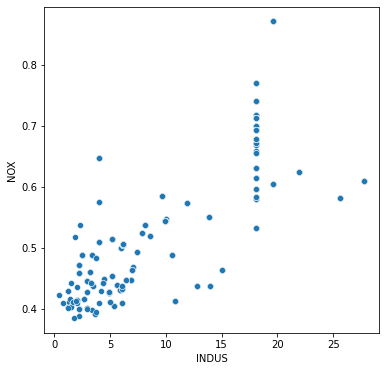

In [16]:
# scatterplot to visualize the relationship between NOX and INDUS
plt.figure(figsize=(6, 6))
sns.scatterplot(x = 'INDUS', y = 'NOX', data = data) #write you code here
plt.show()

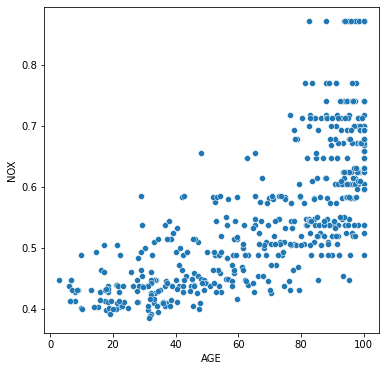

In [17]:
# scatterplot to visualize the relationship between NOX and AGE
plt.figure(figsize=(6, 6))
sns.scatterplot(x = 'AGE', y = 'NOX', data = data) #write you code here
plt.show()

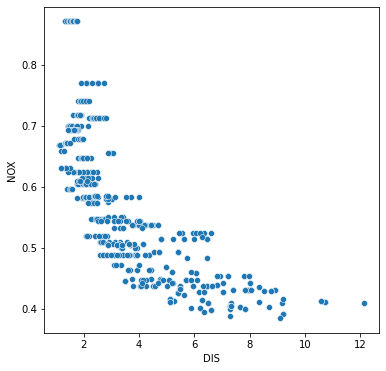

In [18]:
# scatterplot to visualize the relationship between NOX and DIS
plt.figure(figsize=(6, 6))
sns.scatterplot(x = 'DIS', y = 'NOX', data = data) #write you code here
plt.show()

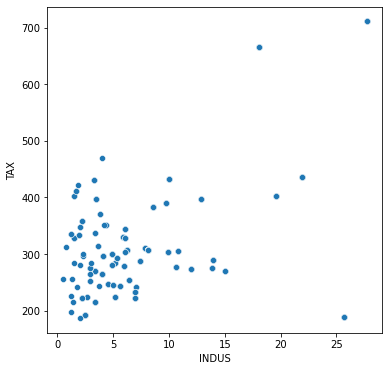

In [19]:
# scatterplot to visualize the relationship between TAX and INDUS
plt.figure(figsize=(6, 6))
sns.scatterplot(x = 'INDUS', y = 'TAX', data = data) #write you code here
plt.show()

# Observations:

The tax rate appears to increase with an increase in the proportion of non-retail business acres per town. This might be due to the reason that the variables TAX and INDUS are related with a third variable.

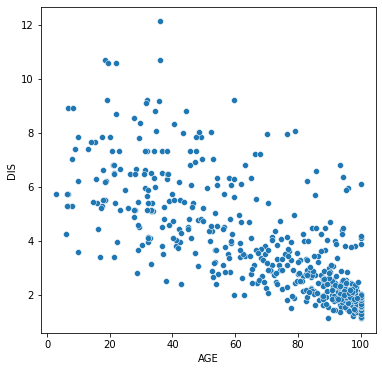

In [20]:
# scatterplot to visualize the relationship between AGE and DIS
plt.figure(figsize=(6, 6))
sns.scatterplot(x = 'AGE', y = 'DIS', data = data)
plt.show()

# Observations:

The distance of the houses to the Boston employment centers appears to decrease moderately as the the proportion of the old houses increase in the town. It is possible that the Boston employment centers are located in the established towns where proportion of owner-occupied units built prior to 1940 is comparatively high.

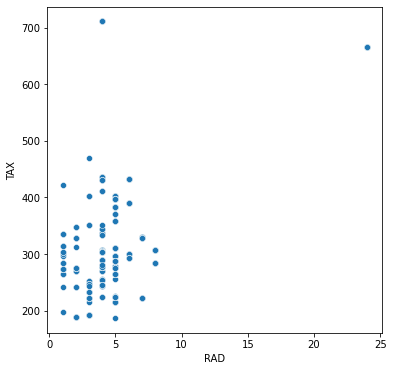

In [21]:
# scatterplot to visulaize the relationship between RAD and TAX
plt.figure(figsize=(6, 6))
sns.scatterplot(x = 'RAD', y = 'TAX', data = data)
plt.show()

# Observations:

The correlation between RAD and TAX is very high. But, no trend is visible between the two variables. This might be due to outliers.(The technique is, however, restricted to linear associations and is overly sensitive to outliers)


Let's check the correlation after removing the outliers.
When we plotted the histplot we observed that most of the values lie below 600

As it contains outliers we can use spearmans rank correlation coefficient instead of this.


Spearman’s is a measure of monotonicity i.e., it determines whether or not the order between the variables is preserved. Of course, a perfect linear relation is monotone, but the opposite does not hold.

In [22]:
from scipy.stats import spearmanr
coef, p = spearmanr(data["RAD"], data["TAX"])
print('Spearmans correlation coefficient: %.3f' % coef)

Spearmans correlation coefficient: 0.705


In [23]:
#As we can see it has reduced significantly but we can also compute it by removing outliers
# removing the data corresponding to high tax rate
df1 = data[data['TAX'] < 600]
# importing the required function
from scipy.stats import pearsonr
# calculating the correlation
print('The correlation between TAX and RAD is', pearsonr(df1['TAX'], df1['RAD'])[0])

The correlation between TAX and RAD is 0.249757313314292


So the high correlation between TAX and RAD is due to the outliers. The tax rate for some properties might be higher due to some other reason.

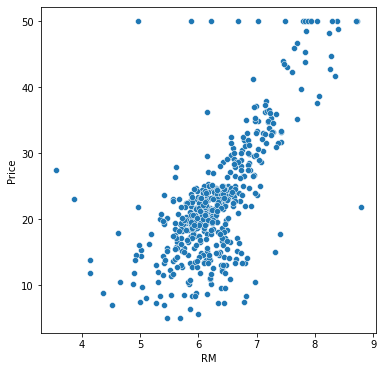

In [24]:
# scatterplot to visulaize the relationship between RM and MEDV
plt.figure(figsize=(6, 6))
sns.scatterplot(x = 'RM', y = 'Price', data = data)
plt.show()

# Observations:

The price of the house seems to increase as the value of RM increases. This is expected as the price is generally higher for more rooms.

There are a few outliers in a horizontal line as the Price value seems to be capped at 50.

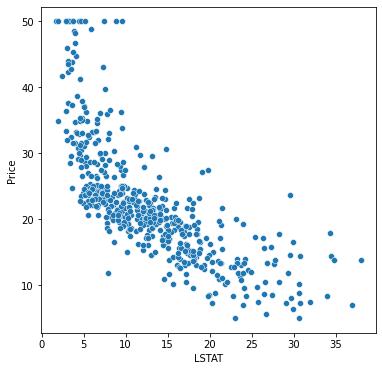

In [25]:
# scatterplot to visulaize the relationship between LSTAT and MEDV
plt.figure(figsize=(6, 6))
sns.scatterplot(x = 'LSTAT', y = 'Price', data = data)
plt.show()


Observations:

The price of the house tends to decrease with an increase in LSTAT. This is also possible as the house price is lower in areas where lower status people live.


There are few outliers and the data seems to be capped at 50.


We have seen that the variables LSTAT and RM have a linear relationship with the dependent variable Price. Also, there are significant relationships among a few independent variables, which is not desirable for a linear regression model. Let's first split the dataset.

# Splitting the Dataset
Let's split the dataset into the dependent and independent variables and further split it into train and test set in a ratio of 70:30 for train and test set.

In [26]:
# separate the dependent and independent variable
Y = data['Price_log']
X = data.drop(columns = {'Price', 'Price_log'})

# add the intercept term
X = sm.add_constant(X)

In [27]:
# splitting the data in 70:30 ratio of train to test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20 , random_state=1)

# Model building

In [28]:
# create the model
model1 = sm.OLS(y_train, X_train).fit()


# get the model summary
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Price_log   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     111.1
Date:                Fri, 07 Oct 2022   Prob (F-statistic):          3.21e-122
Time:                        00:43:43   Log-Likelihood:                 105.37
No. Observations:                 404   AIC:                            -182.7
Df Residuals:                     390   BIC:                            -126.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3176      0.229     18.828      0.000       3.867       4.768
CRIM          -0.0106      0.001     -7.759      0.000      -0.013      -0.008
ZN             0.0015      0.001      2.341      0.020       0.000       0.003
INDUS          0.0022      0.003      0.826      0.409      -0.003       0.008
CHAS           0.0884      0.036      2.440      0.015       0.017       0.160
NOX           -0.8873      0.170     -5.205      0.000      -1.222      -0.552
RM             0.0722      0.019      3.783      0.000       0.035       0.110
AGE            0.0004      0.001      0.696      0.487      -0.001       0.002
DIS           -0.0499      0.009     -5.460      0.000      -0.068      -0.032
RAD            0.0141      0.003      4.524      0.000       0.008       0.020
TAX           -0.0005      0.000     -3.064      0.002      -0.001      -0.000
PTRATIO       -0.0407      0.006     -6.839      0.000      -0.052      -0.029
B              0.0003      0.000      2.692      0.007    8.73e-05       0.001
LSTAT         -0.0292      0.002    -12.754      0.000      -0.034      -0.025
==============================================================================
Omnibus:                       46.686   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.907
Skew:                           0.446   Prob(JB):                     3.46e-37
Kurtosis:                       6.029   Cond. No.                     1.50e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.5e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Observations:

The R-Squared valued value is 0.771, and the adjusted R_Squared value is 0.763

The P-Values for CRIM, CHAS, NOX, RM, DIS, RAD, PTRATIO, and LSTAT all look statistically significant as they are either zero or close to it.

## Checking for Multicollinearity

Next, we will check the multicollinearity in the train dataset.

Checking for Multicollinearity-


We will use the Variance Inflation Factor (VIF), to check if there is multicollinearity in the data.

Features having a VIF score > 5 will be dropped/treated till all the features have a VIF score < 5

In [29]:
X_train.drop(columns = ['const'],axis = 1 , inplace =True)
X_train.drop(columns = ['INDUS'],axis = 1 , inplace =True)

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


# function to check VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif


print(checking_vif(X_train))

    feature        VIF
0      CRIM   2.015327
1        ZN   3.081921
2      CHAS   1.159667
3       NOX  67.197044
4        RM  76.394875
5       AGE  21.446036
6       DIS  15.269248
7       RAD  15.289555
8       TAX  54.067924
9   PTRATIO  85.870653
10        B  20.303046
11    LSTAT  11.547443


Observations:

There are two variables with a high VIF - RAD and TAX. Let's remove TAX as it has the highest VIF values and check the multicollinearity again.


In [31]:
# create the model
X_train = sm.add_constant(X_train)
model1 = sm.OLS(y_train, X_train).fit()


# get the model summary
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Price_log   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     120.4
Date:                Fri, 07 Oct 2022   Prob (F-statistic):          4.02e-123
Time:                        00:43:43   Log-Likelihood:                 105.02
No. Observations:                 404   AIC:                            -184.0
Df Residuals:                     391   BIC:                            -132.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3034      0.229     18.826      0.000       3.854       4.753
CRIM          -0.0106      0.001     -7.788      0.000      -0.013      -0.008
ZN             0.0014      0.001      2.254      0.025       0.000       0.003
CHAS           0.0909      0.036      2.517      0.012       0.020       0.162
NOX           -0.8477      0.164     -5.184      0.000      -1.169      -0.526
RM             0.0711      0.019      3.735      0.000       0.034       0.108
AGE            0.0004      0.001      0.678      0.498      -0.001       0.002
DIS           -0.0512      0.009     -5.688      0.000      -0.069      -0.034
RAD            0.0133      0.003      4.473      0.000       0.007       0.019
TAX           -0.0005      0.000     -2.994      0.003      -0.001      -0.000
PTRATIO       -0.0400      0.006     -6.793      0.000      -0.052      -0.028
B              0.0003      0.000      2.663      0.008    8.38e-05       0.001
LSTAT         -0.0290      0.002    -12.735      0.000      -0.034      -0.025
==============================================================================
Omnibus:                       46.447   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.532
Skew:                           0.444   Prob(JB):                     6.89e-37
Kurtosis:                       6.017   Cond. No.                     1.49e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
del X_train["const"]
print(checking_vif(X_train))
# checking for VIF


    feature        VIF
0      CRIM   2.015327
1        ZN   3.081921
2      CHAS   1.159667
3       NOX  67.197044
4        RM  76.394875
5       AGE  21.446036
6       DIS  15.269248
7       RAD  15.289555
8       TAX  54.067924
9   PTRATIO  85.870653
10        B  20.303046
11    LSTAT  11.547443


In [33]:
del X_train["AGE"]
# create the model
X_train = sm.add_constant(X_train)
model1 = sm.OLS(y_train, X_train).fit()


# get the model summary
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Price_log   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     131.4
Date:                Fri, 07 Oct 2022   Prob (F-statistic):          4.29e-124
Time:                        00:43:43   Log-Likelihood:                 104.78
No. Observations:                 404   AIC:                            -185.6
Df Residuals:                     392   BIC:                            -137.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2919      0.228     18.841      0.000       3.844       4.740
CRIM          -0.0106      0.001     -7.802      0.000      -0.013      -0.008
ZN             0.0014      0.001      2.204      0.028       0.000       0.003
CHAS           0.0919      0.036      2.548      0.011       0.021       0.163
NOX           -0.8201      0.158     -5.182      0.000      -1.131      -0.509
RM             0.0737      0.019      3.961      0.000       0.037       0.110
DIS           -0.0532      0.009     -6.243      0.000      -0.070      -0.036
RAD            0.0132      0.003      4.440      0.000       0.007       0.019
TAX           -0.0005      0.000     -2.981      0.003      -0.001      -0.000
PTRATIO       -0.0397      0.006     -6.764      0.000      -0.051      -0.028
B              0.0003      0.000      2.704      0.007    8.85e-05       0.001
LSTAT         -0.0284      0.002    -13.520      0.000      -0.033      -0.024
==============================================================================
Omnibus:                       48.105   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              174.692
Skew:                           0.462   Prob(JB):                     1.16e-38
Kurtosis:                       6.086   Cond. No.                     1.46e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
del X_train["const"]
print(checking_vif(X_train))
# checking for VIF

    feature        VIF
0      CRIM   2.014823
1        ZN   3.057005
2      CHAS   1.157806
3       NOX  63.025024
4        RM  72.664214
5       DIS  13.146256
6       RAD  15.249398
7       TAX  54.050580
8   PTRATIO  85.661813
9         B  20.280881
10    LSTAT   9.882919


## Observations - 

Age and Indus are clearly insignificant due to the high p value , so we'll remove these two and build the model again.

Now, we will create the linear regression model 

# Examining the significance of the model
It is not enough to fit a multiple regression model to the data, it is necessary to check whether all the regression coefficients are significant or not. Significance here means whether the population regression parameters are significantly different from zero.

From the above it may be noted that the regression coefficients corresponding to ZN, AGE, B, and INDUS are not statistically significant at level α = 0.05. In other words, the regression coefficients corresponding to these three are not significantly different from 0 in the population. Hence, we will eliminate the three features and create a new model.

In [35]:
# creating the model after dropping columns 'Price', 'Price_log', 'TAX', 'ZN', 'AGE', 'B' 'INDUS' from df dataframe
Y = data['Price_log']
X = data.drop(columns = {'Price', 'Price_log', 'AGE', 'INDUS'}) 
X = sm.add_constant(X)

#splitting the data in 80:20 ratio of train to test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25 )
# create the model
model2 = sm.OLS(y_train, X_train).fit() #write your code here
# get the model summary
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Price_log   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     116.8
Date:                Fri, 07 Oct 2022   Prob (F-statistic):          1.43e-112
Time:                        00:43:43   Log-Likelihood:                 94.520
No. Observations:                 379   AIC:                            -165.0
Df Residuals:                     367   BIC:                            -117.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9130      0.239     16.381      0.000       3.443       4.383
CRIM          -0.0093      0.001     -6.480      0.000      -0.012      -0.006
ZN             0.0010      0.001      1.582      0.114      -0.000       0.002
CHAS           0.0908      0.042      2.146      0.033       0.008       0.174
NOX           -0.5697      0.175     -3.256      0.001      -0.914      -0.226
RM             0.0993      0.020      5.056      0.000       0.061       0.138
DIS           -0.0482      0.009     -5.543      0.000      -0.065      -0.031
RAD            0.0144      0.003      4.741      0.000       0.008       0.020
TAX           -0.0007      0.000     -4.000      0.000      -0.001      -0.000
PTRATIO       -0.0368      0.006     -6.122      0.000      -0.049      -0.025
B              0.0005      0.000      3.665      0.000       0.000       0.001
LSTAT         -0.0277      0.002    -12.614      0.000      -0.032      -0.023
==============================================================================
Omnibus:                       32.484   Durbin-Watson:                   2.238
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.093
Skew:                           0.185   Prob(JB):                     5.63e-29
Kurtosis:                       5.846   Cond. No.                     1.49e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
len(X_train)

379

In [36]:
from sklearn.metrics import r2_score
print(r2_score(y_test, model2.predict(X_test)))

0.8122957868055267


In [37]:
from sklearn.model_selection import cross_val_score

In [38]:
from sklearn.model_selection import KFold
model= LinearRegression()
fold = KFold(n_splits = 5,shuffle=True,random_state=100)
scores = cross_val_score(model,X,Y,scoring="r2",cv=fold)
scores
print('Accuracy: {:.2f} %'.format(scores.mean()*100))
print('Standard Deviation {:.2f} %'.format(scores.std()*100))

Accuracy: 76.98 %
Standard Deviation 3.07 %


In [39]:
# Using k=10 in K-fold Cross Validation
from sklearn.model_selection import cross_val_score
linear_reg = LinearRegression()

cvs = cross_val_score(linear_reg,X,Y,cv=3)

print('Accuracy: {:.2f} %'.format(cvs.mean()*100))
print('Standard Deviation {:.2f} %'.format(cvs.std()*100))

Accuracy: 32.27 %
Standard Deviation 42.05 %


In [40]:
cvs

array([ 0.60113492,  0.63843999, -0.27157852])

In [41]:
X

,const,CRIM,ZN,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.0,0.00632,18.0,0.0,0.538,6.575,4.0900,1.0,296.0,15.3,396.90,4.98
1,1.0,0.02731,0.0,0.0,0.469,6.421,4.9671,2.0,242.0,17.8,396.90,9.14
2,1.0,0.02729,0.0,0.0,0.469,7.185,4.9671,2.0,242.0,17.8,392.83,4.03
3,1.0,0.03237,0.0,0.0,0.458,6.998,6.0622,3.0,222.0,18.7,394.63,2.94
4,1.0,0.06905,0.0,0.0,0.458,7.147,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...
501,1.0,0.06263,0.0,0.0,0.573,6.593,2.4786,1.0,273.0,21.0,391.99,9.67
502,1.0,0.04527,0.0,0.0,0.573,6.120,2.2875,1.0,273.0,21.0,396.90,9.08
503,1.0,0.06076,0.0,0.0,0.573,6.976,2.1675,1.0,273.0,21.0,396.90,5.64
504,1.0,0.10959,0.0,0.0,0.573,6.794,2.3889,1.0,273.0,21.0,393.45,6.48


In [42]:
#Using k=10 in K-fold Cross Validation

X = data.drop(columns = {'AGE', 'INDUS','Price_log',"Price"})
from sklearn.model_selection import cross_val_score
linear_reg = LinearRegression()
cvs = cross_val_score(linear_reg,X,Y,cv=10)

print('Accuracy: {:.2f} %'.format(cvs.mean()*100))
print('Standard Deviation {:.2f} %'.format(cvs.std()*100))

Accuracy: 42.17 %
Standard Deviation 35.96 %


In [43]:
cvs

array([ 0.77536442,  0.47126106, -0.46823766,  0.73233901,  0.55368008,
        0.76793142,  0.41760597,  0.28981648,  0.10560949,  0.5720451 ])

# Observations:

We can see that the R-squared value has decreased by 0.004, since we have removed variables from the model, whereas the adjusted R-squared value has decreased by 0.001.


Now, we will check the linear regression assumptions.

# Checking the below linear regression assumptions

Linearity in parameter

No Heteroscedasticity

Functional form of variables (Linear)

Normality of error terms

Multicollinearity 




## Linearity in parameters

In [44]:
import statsmodels.stats.api as sms
import statsmodels.regression.linear_model as smf

Y2 = data2['Price']
X2 = data2.drop(columns = {'Price'}) 

def Rainbow_lin_test(Y,X):
    model = smf.OLS(Y,X).fit()
    lin_p = sms.linear_rainbow(model,frac = 0.5)[1]
    result = "Fail"
    if lin_p>0.1:
        result = "Pass"
    return np.transpose(pd.DataFrame([[lin_p],[0.1],[result]],index = ['Value','Threshold','Result'],columns=['Rainbow linearity p value'] ))
    

     

In [45]:
Rainbow_lin_test(Y2,X2)

,Value,Threshold,Result
Rainbow linearity p value,0.99989,0.1,Pass


## Mean residual 

421   -0.181097
149    0.014775
41    -0.058221
467    0.197285
44    -0.087154
         ...   
273    0.028750
473    0.275551
32     0.156861
289   -0.026060
84    -0.015037
Length: 379, dtype: float64

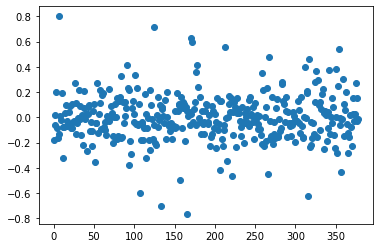

In [52]:
residuals = model2.resid

plt.scatter(range(len(X_train)),residuals)

residuals

# Observations:

The mean of the residuals is very close to 0, therefore, the assumption for residuals is satisfied

Residuals are randomly plotted around 0 

# Checking for homoscedasticity
Homoscedasticity - If the residuals are symmetrically distributed across the regression line, then the data is said to homoscedastic.(variability is equal across values of an explanatory variable)

Heteroscedasticity - If the residuals are not symmetrically distributed across the regression line, then the data is said to be heteroscedastic. In this case, the residuals can form a funnel shape or any other non-symmetrical shape.

We'll use Goldfeldquandt Test to test the following hypothesis with alpha = 0.05

Null hypothesis: Residuals have no heteroscedasticity


Alternate hypothesis: Residuals have heteroscedastic

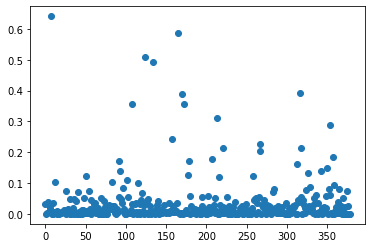

In [53]:
residuals = model2.resid


plt.scatter(range(len(X_train)),np.square(residuals))



As It shows no pattern , we can conclude that there is no homoscedasticity

In [54]:
from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

In [55]:
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(y_train, X_train)
lzip(name, test)

[('F statistic', 0.836417247967194), ('p-value', 0.8824282561536096)]


# Observations:

The above test shows that the p-value is greater than 0.05 which is not stastitically significant and therefore means that we fail to reject the null-hypothesis which says that residuals are homoscedastic, therefore- the assumption for no heteroscedasticity is satisfied.

## No autocorrelation of residuals


To test the assumption, we'll plot residuals and fitted values on a plot and ensure that residuals do not form a strong pattern. They should be randomly and uniformly scattered on the x-axis.

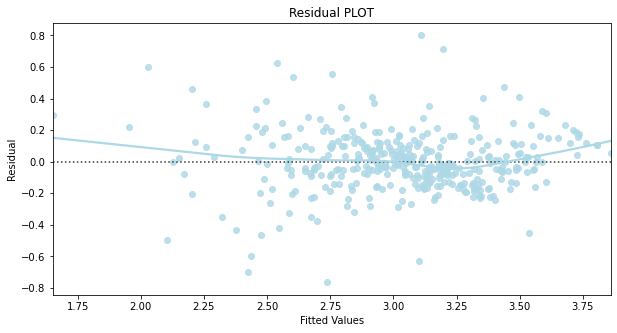

In [56]:
# predicted values
fitted = model2.fittedvalues

# sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
sns.residplot(x = fitted, y = residuals, color="lightblue", lowess=True) #write your code here
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()


# Observations:

- The residuals "bounce randomly" around the 0 line. This suggests that there is no autocorrelation
- The residuals roughly form a "horizontal band" around the 0 line. This suggests that the variances of the error terms are equal.
- No one residual "stands out" from the basic random pattern of residuals. This suggests that there are no outliers.

# Normality of error terms
The residuals should be normally distributed.

<AxesSubplot:ylabel='Count'>

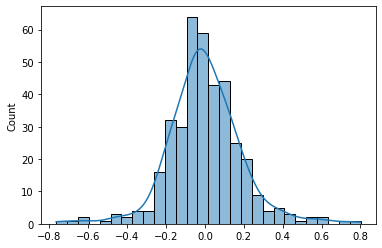

In [57]:
# Plot histogram of residuals
sns.histplot(residuals, kde = True)

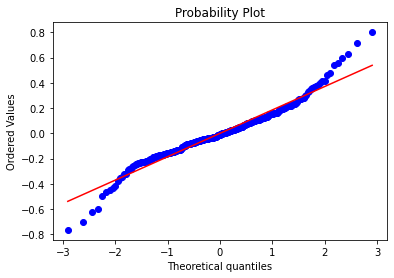

In [58]:
# Plot q-q plot of residuals
import pylab
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=pylab)
plt.show()

## Multicollinearity 

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# function to check VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif


print(checking_vif(X_train))

    feature         VIF
0     const  588.968589
1      CRIM    1.673594
2        ZN    2.270041
3      CHAS    1.052589
4       NOX    4.003777
5        RM    1.920913
6       DIS    3.407508
7       RAD    7.323516
8       TAX    7.786115
9   PTRATIO    1.806486
10        B    1.308153
11    LSTAT    2.556832


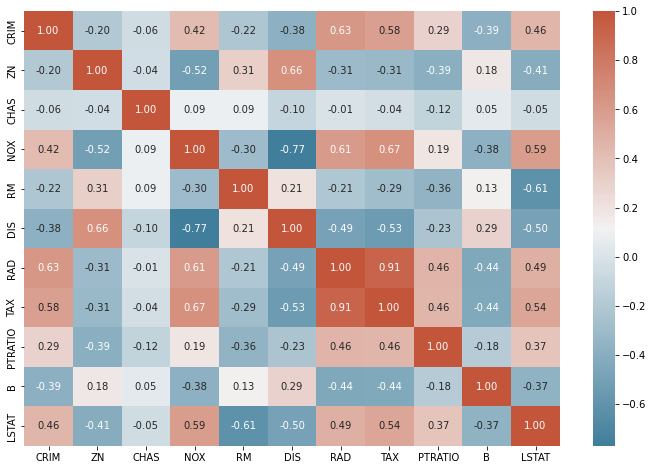

In [60]:
plt.figure(figsize = (12,8))
cmap = sns.diverging_palette(230,20,as_cmap=True)
sns.heatmap(X.corr(),annot=True,fmt='.2f',cmap=cmap)
plt.show()

Since the VIF score is less than 10 and using the corr matrix we can see that no correlation between the independent variable is significant

# Observations:

The above two graphs show that the residuals are normally distributed, therefore the assumption for normality is satisfied.

# Checking the performance of the model on the train and test data set

In [61]:
# RMSE
def rmse(predictions, targets):
    return np.sqrt(((targets - predictions) ** 2).mean())


# MAPE
def mape(predictions, targets):
    return np.mean(np.abs((targets - predictions)) / targets) * 100


# MAE
def mae(predictions, targets):
    return np.mean(np.abs((targets - predictions)))


# Model Performance on test and train data
def model_pref(olsmodel, x_train, x_test):

    # In-sample Prediction
    y_pred_train = olsmodel.predict(x_train)
    y_observed_train = y_train
    # Prediction on test data
    y_pred_test = olsmodel.predict(x_test)
    y_observed_test = y_test

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    rmse(y_pred_train, y_observed_train),
                    rmse(y_pred_test, y_observed_test),
                ],
                "MAE": [
                    mae(y_pred_train, y_observed_train),
                    mae(y_pred_test, y_observed_test),
                ],
                "MAPE": [
                    mape(y_pred_train, y_observed_train),
                    mape(y_pred_test, y_observed_test),
                ],
            }
      )
    )


# Checking model performance
model_pref(model2, X_train, X_test)  

    Data      RMSE       MAE      MAPE
0  Train  0.188561  0.135705  4.734183
1   Test  0.187337  0.125427  4.435499


# Observations:

The mean absolute percentage error is 4.82 on the training data and 5.55 on the test data

The mean absolute error is 0.14 on the training data and 0.16 on the test data.

The Root Mean Squared Error is 0.191 on the training data and 0.2077 on the test data. We use this value to assess how accurately the model predicts the response.

# Applying cross validation to improve the model and evaluating it using different evaluation metrics¶

In [62]:
# import the required function

from sklearn.model_selection import cross_val_score

# build the regression model and cross-validate
linearregression = LinearRegression()                                    

cv_Score11 = cross_val_score(linearregression, X, Y, cv = 7,scoring = "r2")
cv_Score12 = cross_val_score(linearregression, X, Y, cv = 7)                              


print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std() * 2))

RSquared: 0.589 (+/- 0.364)
Mean Squared Error: -0.589 (+/- 0.364)


In [63]:
cvs

array([ 0.77536442,  0.47126106, -0.46823766,  0.73233901,  0.55368008,
        0.76793142,  0.41760597,  0.28981648,  0.10560949,  0.5720451 ])

Observations

The R-squared on the cross validation is 0.733, whereas on the training dataset it was 0.776
And the MSE on cross validation is 0.04, whereas on the training dataset it was 0.0361

# Regression Equatiom

In [64]:
coef1 = pd.DataFrame({"Features":model2.params, "Coefs":np.transpose(model2.params.values)})

Equation = "log (Price) ="
print(Equation, end='\t')
for i in range(len(coef1)):
    print('(', coef1['Features'][i], ') * ', coef1.index[i], '+', end = ' ')

log (Price) =	( 3.912972340780019 ) *  const + ( -0.009275357600473128 ) *  CRIM + ( 0.00102231627385722 ) *  ZN + ( 0.09075547176424367 ) *  CHAS + ( -0.5696825378421015 ) *  NOX + ( 0.09932813603097718 ) *  RM + ( -0.048186091399896165 ) *  DIS + ( 0.01439849456030553 ) *  RAD + ( -0.0006512482985611427 ) *  TAX + ( -0.03679722330789508 ) *  PTRATIO + ( 0.0004849651752286791 ) *  B + ( -0.027669247097432285 ) *  LSTAT + 

In [65]:
coef1.count()

Features    12
Coefs       12
dtype: int64

Conclusions

First we did EDA on the data set and did initial visual analysis on the variables including both univariate and bivariate analysis.

We then checked for multicollinearity, and dropped the TAX column as a result.

Then we ran our linear regression model on the data and observed the results. Following that, we dropped variables that were not significant and examined the changes in the R-Squared variable.

Checked to make sure our model satisfies the assumptions of linear regression.

We then checked the performance of our model using various evaluation metrics including cross validation.

We then finalized our regression equation

##  Applying  PCA to remove multicollinearity

Eigenvalues:
[4.85790871 1.30976106 1.22066895 0.86568087 0.80685333 0.67306728
 0.52756911 0.29839509 0.22964087 0.16684408 0.07271118 0.        ]

Variances (Percentage):
[44.04628189 11.87550205 11.06771082  7.84906135  7.31567663  6.10264891
  4.78342827  2.70552512  2.08213598  1.51276235  0.65926663  0.        ]



Text(0, 0.5, 'Explained variance (%)')

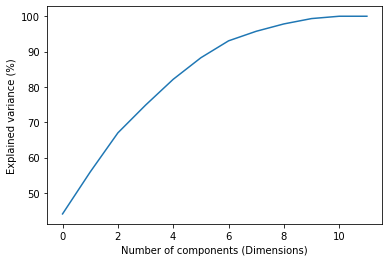

In [66]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X_train)

# Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
pca.fit(X_scaled)

# Get the eigenvalues
print("Eigenvalues:")
print(pca.explained_variance_)
print()

# Get explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

# Make the scree plot
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components (Dimensions)")
plt.ylabel("Explained variance (%)")

In [80]:
# Do feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=7)
X_pca = pca.fit_transform(X_scaled)

# Get the transformed dataset
X_pca = pd.DataFrame(X_pca)
print(X_pca.head())
print("\nSize: ")
print(X_pca.shape)

          0         1         2         3         4         5         6
0 -1.862554  0.636965  0.194331 -0.203652  0.962692  0.432946  0.097425
1 -1.557602  0.071013 -0.718703 -0.402817  0.189624 -0.258003  0.508415
2 -2.036637  0.381605  0.088688 -1.194751  0.029377 -0.403850  0.584260
3 -2.148490 -0.047582 -0.095075 -1.107664 -0.369183 -0.581160  0.571503
4 -2.083641 -0.027059 -0.069535 -1.096804 -0.328599 -0.553535  0.589748

Size: 
(506, 7)


<AxesSubplot:>

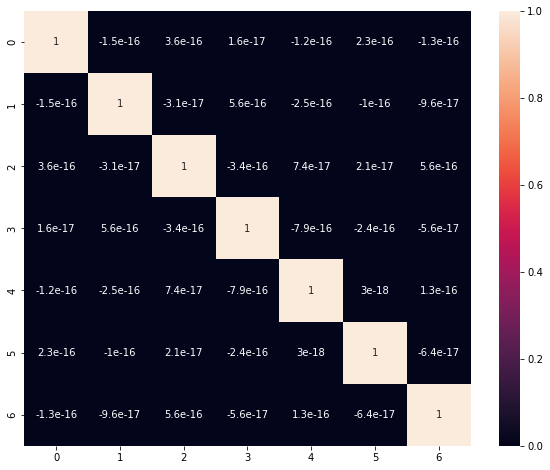

In [81]:
fig = plt.figure(figsize=(10, 8))
sns.heatmap(X_pca.corr(), 
            annot=True)

In [82]:
y_train

321    3.139833
37     3.044522
286    3.000720
2      3.546740
25     2.631889
         ...   
22     2.721295
72     3.126761
493    3.081910
15     2.990720
168    3.169686
Name: Price_log, Length: 404, dtype: float64

In [83]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, Y, test_size=0.20, 
                                                            shuffle=True, random_state=2)

In [102]:
X_test_pca = sm.add_constant(X_test_pca)
model2 = sm.OLS(y_train, X_train_pca).fit() #write your code here
# get the model summary
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Price_log   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     172.8
Date:                Fri, 07 Oct 2022   Prob (F-statistic):          2.01e-107
Time:                        01:25:24   Log-Likelihood:                 53.035
No. Observations:                 404   AIC:                            -92.07
Df Residuals:                     397   BIC:                            -64.06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0329      0.011    284.651      0.000       3.012       3.054
0             -0.1347      0.005    -27.313      0.000      -0.144      -0.125
1              0.1098      0.009     11.628      0.000       0.091       0.128
2              0.0805      0.010      8.465      0.000       0.062       0.099
3             -0.1069      0.012     -9.200      0.000      -0.130      -0.084
4             -0.0337      0.012     -2.872      0.004      -0.057      -0.011
6             -0.0360      0.015     -2.461      0.014      -0.065      -0.007
==============================================================================
Omnibus:                       99.382   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              631.565
Skew:                           0.872   Prob(JB):                    7.20e-138
Kurtosis:                       8.872   Cond. No.                         2.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [97]:
 del X_test_pca[5]

In [100]:
model2 = sm.OLS(y_train, X_train_pca).fit() #write your code here
# get the model summary
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Price_log   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     172.8
Date:                Fri, 07 Oct 2022   Prob (F-statistic):          2.01e-107
Time:                        01:24:06   Log-Likelihood:                 53.035
No. Observations:                 404   AIC:                            -92.07
Df Residuals:                     397   BIC:                            -64.06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0329      0.011    284.651      0.000       3.012       3.054
0             -0.1347      0.005    -27.313      0.000      -0.144      -0.125
1              0.1098      0.009     11.628      0.000       0.091       0.128
2              0.0805      0.010      8.465      0.000       0.062       0.099
3             -0.1069      0.012     -9.200      0.000      -0.130      -0.084
4             -0.0337      0.012     -2.872      0.004      -0.057      -0.011
6             -0.0360      0.015     -2.461      0.014      -0.065      -0.007
==============================================================================
Omnibus:                       99.382   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              631.565
Skew:                           0.872   Prob(JB):                    7.20e-138
Kurtosis:                       8.872   Cond. No.                         2.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [98]:
# import the required function

from sklearn.model_selection import cross_val_score

# build the regression model and cross-validate
linearregression = LinearRegression()                                    

cv_Score11 = cross_val_score(linearregression, X_test_pca, y_test, cv = 7,scoring = "r2")
cv_Score12 = cross_val_score(linearregression, X_test_pca, y_test, cv = 7)                              


print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std() * 2))

RSquared: 0.735 (+/- 0.281)
Mean Squared Error: -0.735 (+/- 0.281)


In [103]:
print(r2_score(y_test, model2.predict(X_test_pca)))

0.7805060415039246
